In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline
import json
import glob
import numpy as np
from PIL import Image
import rasterio
from rasterio.mask import mask
from rasterio.plot import reshape_as_image
#from scipy.misc import imsave
from imageio import imwrite
from sklearn.cluster import DBSCAN
from shapely.geometry import box
Image.MAX_IMAGE_PIXELS = None
import tifffile as tiff

In [2]:
liebre1_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebrepansharp.tif"
liebre1_box_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/liebre1_boxes.geojson"

In [3]:
image_array = tiff.imread(liebre1_image_path)

In [16]:
print(image_array.max())
image_array

2486


array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       ...,

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [550, 554, 811, 893],
        [547, 551, 808, 890],
        [513, 517, 774, 856]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [526, 530, 787, 869],
        [476, 480, 737, 819],
        [470, 474, 731, 813]],

       [[  0

In [5]:
norm_array = (image_array - image_array.min())/(image_array.max()-image_array.min())*image_array.max()

In [6]:
norm_array

array([[[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]],

       [[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]],

       [[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        ...,
        [550., 554., 811., 893.],
        [547., 551., 808., 890.],
        [513., 517., 774., 856.]],

       [[  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.],
        .

In [7]:
rgba_array = np.uint8(norm_array)

In [15]:
rgba_array

array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       ...,

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [ 38,  42,  43, 125],
        [ 35,  39,  40, 122],
        [  1,   5,   6,  88]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [ 14,  18,  19, 101],
        [220, 224, 225,  51],
        [213, 218, 219,  45]],

       [[  0

In [9]:
PIL_image = Image.fromarray(np.uint8(norm_array))#.convert('RGB')

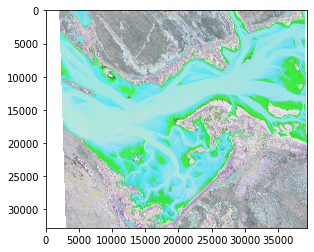

In [10]:
plt.imshow(PIL_image)

In [11]:
from src.preprocessing.dataprocessing import convert_coords, save_files, read_coords

In [12]:
geotif = rasterio.open(liebre1_image_path)

In [13]:
file_save_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/norm_im_test"

<class 'PIL.Image.Image'>


KeyboardInterrupt: 

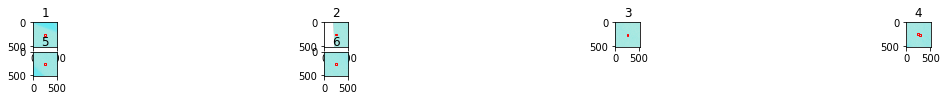

In [14]:
with open(liebre1_box_path, 'r') as f:
    label = json.load(f)
    image = PIL_image
    print(type(image))

    coords, centres = read_coords(label)
    
    # convert bounding box coordinates from geographic to image-scaled
    centres_converted = np.array([convert_coords(image, geotif, label, point[0], point[1]) for point in centres])
    
    coords_converted = np.array([[convert_coords(image, geotif, label, point[0][0], point[0][1]), 
                                  convert_coords(image, geotif, label, point[1][0], point[1][1])] 
                            for point in coords
                       ])    
    
    ## DB-Scan algorithm for clustering ##
    
    eps = 250 # threshold distance between two points to be in the same 'neighbourhood'
    dbscan = DBSCAN(min_samples=1, eps=eps)
    y = dbscan.fit_predict(centres_converted)

    # storing coordinates of clusters, relative to boundaries of image (not tile)
    info = {}
    for i in range(y.max()+1):
        
        # calculate the max and min coords of all the bounding boxes in the cluster
        box_centres = centres_converted[np.where(y==i)[0]]
        min_x, max_x = box_centres[:, 0].min(), box_centres[:, 0].max()
        min_y, max_y = box_centres[:, 1].min(), box_centres[:, 1].max()
        
        # assign each cluster of objects as an item
        item = {}
        item['centre'] = [(min_x+max_x)//2, (min_y+max_y)//2]
        item['object_boxes'] = coords_converted[np.where(y==i)[0]].tolist()
        item['name'] = "whale"
        info[i] = item
        
        # add a line here to generalize to multiple categories:
        # if label['features']['NumShip'] == ... : 

    save_files(image, label, info, file_save_path, 'liebre1norm')